<a href="https://colab.research.google.com/github/Shristi0124/Image_Reacognition_with_Convolutional/blob/main/image_recorgnizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(X,y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

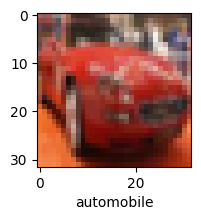

In [ ]:
plot_sample(X_train, y_train, 5)

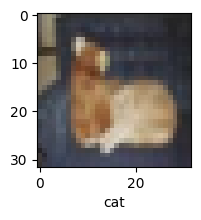

In [ ]:
plot_sample(X_train, y_train, 17)

In [ ]:
X_train = X_train/255.0
X_test = X_test /255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
    ])
ann.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

ann.fit(X_train , y_train , epochs =5 )


In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann. predict(X_test)
y_pred_classes =  [np.argmax(element) for element in y_pred]
print('classification  report : \n ', classification_report(y_test, y_pred_classes))

In [ ]:
import seaborn as sns
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot  = True)
plt.ylabel('Truth')
plt.xlabel('prediction')
plt.title('Confusion matrix')
plt.show

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64 , kernel_size= (3,3), activation='relu'),layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation = 'softmax')
])

In [ ]:
cnn.compile(optimizer ='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train ,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 58ms/step - accuracy: 0.3652 - loss: 1.7374
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 53ms/step - accuracy: 0.5856 - loss: 1.1702
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 39ms/step - accuracy: 0.6531 - loss: 1.0016
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 48ms/step - accuracy: 0.6762 - loss: 0.9334
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 40ms/step - accuracy: 0.7012 - loss: 0.8604
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.7227 - loss: 0.8021
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.7393 - loss: 0.7518
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.7520 - loss: 0.7175
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.7634 - loss: 0.6774
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7787 - loss: 0.6348


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6993 - loss: 0.9028


[0.9130850434303284, 0.6929000020027161]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes

[8,
 8,
 8,
 0,
 6,
 6,
 3,
 6,
 3,
 1,
 0,
 9,
 3,
 7,
 9,
 6,
 5,
 3,
 8,
 6,
 7,
 0,
 4,
 9,
 4,
 2,
 2,
 0,
 9,
 6,
 6,
 5,
 4,
 3,
 9,
 3,
 7,
 0,
 9,
 5,
 0,
 6,
 7,
 6,
 0,
 9,
 3,
 3,
 7,
 6,
 9,
 8,
 2,
 3,
 8,
 8,
 5,
 5,
 5,
 5,
 7,
 5,
 4,
 0,
 6,
 2,
 1,
 0,
 5,
 4,
 0,
 6,
 8,
 8,
 0,
 2,
 2,
 3,
 5,
 8,
 8,
 1,
 1,
 7,
 3,
 7,
 2,
 8,
 8,
 9,
 0,
 2,
 8,
 6,
 4,
 6,
 6,
 0,
 0,
 7,
 4,
 2,
 6,
 3,
 1,
 1,
 3,
 6,
 3,
 7,
 4,
 0,
 6,
 2,
 9,
 3,
 0,
 4,
 3,
 5,
 8,
 7,
 1,
 2,
 8,
 0,
 8,
 3,
 3,
 0,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 2,
 8,
 3,
 5,
 6,
 5,
 8,
 7,
 6,
 6,
 5,
 3,
 0,
 1,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 6,
 0,
 4,
 8,
 6,
 9,
 0,
 9,
 9,
 9,
 4,
 9,
 9,
 3,
 7,
 5,
 9,
 0,
 5,
 2,
 2,
 0,
 8,
 6,
 2,
 3,
 0,
 5,
 8,
 0,
 1,
 7,
 6,
 8,
 8,
 7,
 8,
 5,
 0,
 8,
 7,
 1,
 3,
 0,
 5,
 7,
 9,
 2,
 0,
 3,
 9,
 8,
 0,
 7,
 9,
 0,
 2,
 4,
 5,
 9,
 2,
 4,
 9,
 2,
 2,
 3,
 2,
 5,
 1,
 5,
 1,
 8,
 0,
 4,
 7,
 5,
 3,
 1,
 1,
 1,
 9,
 0,
 6,
 0,
 8,
 2,
 0,


In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

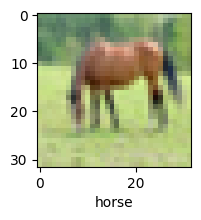

In [ ]:
plot_sample(X_test, y_test , 60)

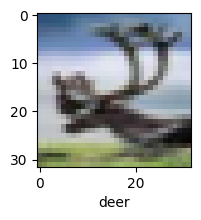

In [ ]:
plot_sample(X_test, y_test , 40)

In [ ]:
classes[y_classes[40]]

'airplane'